In [1]:
import os
import pandas as pd
from emobpy import DataBase
from emobpy import Mobility

In [2]:
ts_generation_path = os.getcwd()
os.chdir("../")
data_path = os.getcwd()
os.chdir(ts_generation_path)

path = os.getcwd()
consumption_path = os.path.join(path, "db", "consumption")
availability_path = os.path.join(path, "db", "availability")
profile_path  = os.path.join(path, "db", "profile")

DB = DataBase('db')
DB_consumption = DataBase("db/consumption")
DB_availability = DataBase("db/availability")
DB_profile = DataBase('db/profile')

#generate new profiles

for i in range(1000):
    try: 
        m = Mobility(config_folder='config_files')
        m.set_params(
                 name_prefix="BEV{}".format(i),
                 total_hours=168,
                 time_step_in_hrs=0.25, # 15 minutes
                 category="user_defined",
                 reference_date="01/01/2020"
                )
        m.set_stats(
                stat_ntrip_path="TripsPerDay.csv",
                stat_dest_path="DepartureDestinationTrip.csv",
                stat_km_duration_path="DistanceDurationTrip.csv",
                )
        m.set_rules(rule_key="user_defined")
        # see /config_files/rules.yml, it contains a dictionary, whose key must be the same
        # as rule_key. To see all possible rules `from emobpy.constants import RULE; RULE`
        m.run()
        m.save_profile(folder="db/profile", description='') # save all info in pickle file in 'db' folder

    except ValueError:
        pass

DB_profile.update()                # This load new files hosted in database folder as result of new generated files

In [37]:
from emobpy import Consumption, HeatInsulation, BEVspecs
DB_profile.update()


mname = list(DB_profile.db.keys())     # getting the id of the first mobility profile
HI = HeatInsulation(True)            # Creating the heat insulation by copying the default configuration
BEVS = BEVspecs()                    # Database that contains BEV models


      #Choosing the models I want to assign to the profiles:
#Brand: model: Charging efficiency,year ##
models = {
    "Audi":{
        "e-tron 55 quattro": [(0.1, 2019), (0.2, 2020)],
        "e-tron 55 quattro Premium Plus": [(0.1, 2019)],
        "e-tron 55 quattro Prestige": [(0.1, 2019)],
        "e-tron Sportback 50 quattro": [(0.1, 2020)],
        "e-tron Sportback 55 quattro": [(0.1, 2020)]
    },
    "BMW":{"i3 22 kWh": [(0.1, 2014), (0.1, 2015), (0.1, 2016)],
           "i3 33 kWh": [(0.1, 2017), (0.1, 2018)],
           "i3 42 kWh": [(0.1, 2019)],
           "i3s 33 kWh": [(0.1, 2018)],
           "i3s 42 kWh": [(0.1, 2019)],
           "i3s Edition RoadStyle 42 kWh": [(0.1, 2020)]
    }
}

In [ ]:
models_assigned = {}
# assign models to profiles
for brand in models.keys():
    models_assigned[brand] = {}
    for m in models[brand].keys():
        models_assigned[brand][m] = {}
        for (p, y) in models[brand][m]:
            models_assigned[brand][m][y] = (BEVS.model((brand,m,y)),p)      

In [52]:
folder_size = 1000
folder_num = 0
consumption_path_new = os.path.join(consumption_path, f"{folder_num}")
DB_consumption.update()

#create consumption for every profile and respective car properties
for f, file in enumerate(mname):
    for brand in list(models_assigned.keys())[:1]:
        for m in list(models_assigned[brand].keys())[:1]:
            for y in list(models_assigned[brand][m].keys())[:1]:
                car_model = models_assigned[brand][m][y][0]
                
                if (f*3 > folder_size): ##allgemeine Regel aufschreiben 
                    folder_size += folder_size + 1000
                    consumption_path_new = os.path.join(consumption_path, f"{folder_num}")
                    os.makedirs(consumption_path_new, exist_ok=True)  # succeeds even if directory exists.
                    folder_num += 1
                    print(consumption_path_new)
                
                #for i in range(0, round(models_assigned[brand][m][y][1] * len(mname))):
                print(car_model)
                c = Consumption(file, car_model)
                c.load_setting_mobility(DB_profile)
                c.run(
                    heat_insulation=HI,
                    weather_country='DE',
                    weather_year=2016,
                    passenger_mass=75,                   # kg
                    passenger_sensible_heat=70,          # W
                    passenger_nr=1.5,                    # Passengers per vehicle including driver
                    air_cabin_heat_transfer_coef=20,     # W/(m2K). Interior walls
                    air_flow = 0.02,                     # m3/s. Ventilation
                    driving_cycle_type='WLTC',           # Two options "WLTC" or "EPA"
                    road_type=0,                         # For rolling resistance, Zero represents a new road.
                    road_slope=0
                )
                c.save_profile(consumption_path_new)

New profile running: BEV316_W2_b1d38_Audi_e-tron_55_quattro_2019_a3bc8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV112_W2_7da24_Audi_e-tron_55_quattro_2019_09cc0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV232_W2_54106_Audi_e-tron_55_quattro_2019_f6148
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [3 / 3] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV425_W2_5fa43_Audi_e-tron_55_quattro_2019_113ad
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV888_W2_90de8_Audi_e-tron_55_quattro_2019_ead0e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [2 / 2] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV270_W2_98272_Audi_e-tron_55_quattro_2019_7b436
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV359_W2_48f33_Audi_e-tron_55_quattro_2019_c4362
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV358_W2_3a3f5_Audi_e-tron_55_quattro_2019_e6ea6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV328_W2_b723b_Audi_e-tron_55_quattro_2019_6b2b4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV23

New profile running: BEV317_W2_f97b3_Audi_e-tron_55_quattro_2019_298e9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV384_W2_02c19_Audi_e-tron_55_quattro_2019_eb584
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV349_W2_4705c_Audi_e-tron_55_quattro_2019_fa8ec
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV236_W2_a70d2_Audi_e-tron_55_quattro_2019_7fc10
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV40_W2_3dd8e_Audi_e-tron_55_quattro_2019_21255
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Document

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV220_W2_0364d_Audi_e-tron_55_quattro_2019_c1308
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV60_W2_ef7b8_Audi_e-tron_55_quattro_2019_fc777
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_

Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV451_W2_cedd9_Audi_e-tron_55_quattro_2019_4667d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV340_W2_124ec_Audi_e-tron_55_quattro_2019_72bb2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV17

New profile running: BEV882_W2_6e328_Audi_e-tron_55_quattro_2019_98b5f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV281_W2_39407_Audi_e-tron_55_quattro_2019_f9ce0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV759_W2_62113_Audi_e-tron_55_quattro_2019_ed0a1
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

New profile running: BEV3_W2_c2d19_Audi_e-tron_55_quattro_2019_76917
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV0_W2_21afc_Audi_e-tron_55_quattro_2019_14e3c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV51_W2_51adb_Audi_e-tron_55_quattro_2019_6a5cd
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Pro

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV655_W2_568d5_Audi_e-tron_55_quattro_2019_c3b3f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV133_W2_c73f9_Audi_e-tron_55_quattro_2019_b0033
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Docum

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV233_W2_ba4ce_Audi_e-tron_55_quattro_2019_bf400
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV977_W2_67ea8_Audi_e-tron_55_quattro_2019_0f9bc
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/

Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV266_W2_ef2c0_Audi_e-tron_55_quattro_2019_7cfa8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV469_W2_bdc4f_Audi_e-tron_55_quattro_2019_884f0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV41

New profile running: BEV541_W2_79904_Audi_e-tron_55_quattro_2019_d871b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV192_W2_92cd6_Audi_e-tron_55_quattro_2019_a5129
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [23 / 23] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV252_W2_394a1_Audi_e-tron_55_quattro_2019_89981
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV958_W2_80a3d_Audi_e-tron_55_quattro_2019_5159d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV275_W2_65029_Audi_e-tron_55_quattro_2019_0a911
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV146_W2_ab6c8_Audi_e-tron_55_quattro_2019_2e773
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [23 / 23] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV455_W2_4015e_Audi_e-tron_55_quattro_2019_6e8af
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/

Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV177_W2_d4440_Audi_e-tron_55_quattro_2019_52675
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV62_W2_0beea_Audi_e-tron_55_quattro_2019_48b88
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4

New profile running: BEV43_W2_7d695_Audi_e-tron_55_quattro_2019_fee44
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV242_W2_fd1ef_Audi_e-tron_55_quattro_2019_c94c5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV62_W2_d310b_Audi_e-tron_55_quattro_2019_be547
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV210_W2_dca5d_Audi_e-tron_55_quattro_2019_b2bf3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV879_W2_9d75c_Audi_e-tron_55_quattro_2019_2612f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV114_W2_f6f9c_Audi_e-tron_55_quattro_2019_f5200
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV625_W2_706ed_Audi_e-tron_55_quattro_2019_0de3e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV567_W2_78a80_Audi_e-tron_55_quattro_2019_5c512
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV429_W2_a00ea_Audi_e-tron_55_quattro_2019_8d2c4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV530_W2_42085_Audi_e-tron_55_quattro_2019_ca83f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV276_W2_ba3bc_Audi_e-tron_55_quattro_2019_e9a8c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV525_W2_6bbe5_Audi_e-tron_55_quattro_2019_4faae


New profile running: BEV464_W2_c887b_Audi_e-tron_55_quattro_2019_23fae
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV305_W2_3ec82_Audi_e-tron_55_quattro_2019_e0ae6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3_W2_c8098_Audi_e-tron_55_quattro_2019_76592
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV433_W2_ec117_Audi_e-tron_55_quattro_2019_252e8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV311_W2_1343f_Audi_e-tron_55_quattro_2019_cb65c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/H

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [22 / 22] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV98_W2_440a4_Audi_e-tron_55_quattro_2019_2afa6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2_W2_99ebc_Audi_e-tron_55_quattro_2019_0f7a8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_

Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV460_W2_b89f6_Audi_e-tron_55_quattro_2019_8ba34
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV364_W2_39f9f_Audi_e-tron_55_quattro_2019_348d2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV21

New profile running: BEV142_W2_31060_Audi_e-tron_55_quattro_2019_6aa5c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV35_W2_d9bee_Audi_e-tron_55_quattro_2019_03155
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV168_W2_d9150_Audi_e-tron_55_quattro_2019_6eca0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV241_W2_eb4bf_Audi_e-tron_55_quattro_2019_f8f6d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV140_W2_d7492_Audi_e-tron_55_quattro_2019_96e0c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV447_W2_9bb9c_Audi_e-tron_55_quattro_2019_86f02
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV86_W2_1b699_Audi_e-tron_55_quattro_2019_76fe3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_em

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV300_W2_4225d_Audi_e-tron_55_quattro_2019_96803
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV13_W2_dadfc_Audi_e-tron_55_quattro_2019_2a4b3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9

New profile running: BEV665_W2_0ba3e_Audi_e-tron_55_quattro_2019_4efef
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV695_W2_c88c3_Audi_e-tron_55_quattro_2019_a3202
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV227_W2_f5d0e_Audi_e-tron_55_quattro_2019_3cb8f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV174_W2_2973a_Audi_e-tron_55_quattro_2019_61149
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [2 / 2] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV517_W2_60d94_Audi_e-tron_55_quattro_2019_a2220
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV261_W2_6b191_Audi_e-tron_55_quattro_2019_11c24
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV19_W2_874bf_Audi_e-tron_55_quattro_2019_440fe
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_em

Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV514_W2_4f9bd_Audi_e-tron_55_quattro_2019_094e5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV203_W2_25e96_Audi_e-tron_55_quattro_2019_1e598
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV220_

New profile running: BEV308_W2_f2998_Audi_e-tron_55_quattro_2019_dd69c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV56_W2_1487b_Audi_e-tron_55_quattro_2019_78994
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV22_W2_012f7_Audi_e-tron_55_quattro_2019_2a614
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV0_W2_d681c_Audi_e-tron_55_quattro_2019_84406
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV217_W2_c15fb_Audi_e-tron_55_quattro_2019_1e0b0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Her

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV964_W2_fee6f_Audi_e-tron_55_quattro_2019_07074
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV911_W2_91098_Audi_e-tron_55_quattro_2019_3f759
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/

Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV770_W2_4294c_Audi_e-tron_55_quattro_2019_15fc0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV401_W2_d3659_Audi_e-tron_55_quattro_2019_dacb5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV21

New profile running: BEV480_W2_7418f_Audi_e-tron_55_quattro_2019_387a6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV431_W2_e50ea_Audi_e-tron_55_quattro_2019_990e7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV993_W2_4cc76_Audi_e-tron_55_quattro_2019_ddcbc
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV712_W2_9bb22_Audi_e-tron_55_quattro_2019_caf2b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV269_W2_127ec_Audi_e-tron_55_quattro_2019_a112a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV753_W2_820ec_Audi_e-tron_55_quattro_2019_6ea06
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV286_W2_b22f7_Audi_e-tron_55_quattro_2019_397dc
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV303_W2_6927a_Audi_e-tron_55_quattro_2019_8868a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV593_W2_d4f20_Audi_e-tron_55_quattro_2019_6fc05
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV66_W

New profile running: BEV324_W2_91369_Audi_e-tron_55_quattro_2019_0e7f7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV312_W2_7f4ea_Audi_e-tron_55_quattro_2019_51029
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV149_W2_40c48_Audi_e-tron_55_quattro_2019_4cc65
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV46_W2_c1e7f_Audi_e-tron_55_quattro_2019_01b88
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV82_W2_17ce8_Audi_e-tron_55_quattro_2019_c68e3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/H

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV67_W2_9e214_Audi_e-tron_55_quattro_2019_981af
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV149_W2_28b45_Audi_e-tron_55_quattro_2019_6b7ff
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/m

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV566_W2_4ecdc_Audi_e-tron_55_quattro_2019_13c17
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [21 / 21] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV306_W2_47f51_Audi_e-tron_55_quattro_2019_9e951
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

New profile running: BEV251_W2_4b901_Audi_e-tron_55_quattro_2019_1c9e2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV443_W2_22f29_Audi_e-tron_55_quattro_2019_f417d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1_W2_b9b8c_Audi_e-tron_55_quattro_2019_62c29
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin


temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV204_W2_d9828_Audi_e-tron_55_quattro_2019_2f6d6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV80_W2_06898_Audi_e-tron_55_quattro_2019_5af8e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Docume

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV343_W2_c8850_Audi_e-tron_55_quattro_2019_393dd
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV372_W2_a7a1f_Audi_e-tron_55_quattro_2019_4dd2b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV62_W2_255e5_Audi_e-tron_55_quattro_2019_cb539
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV573_W2_b74ff_Audi_e-tron_55_quattro_2019_45212
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV293

New profile running: BEV113_W2_25fb2_Audi_e-tron_55_quattro_2019_50fed
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV164_W2_354e3_Audi_e-tron_55_quattro_2019_8fa74
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV562_W2_a35d6_Audi_e-tron_55_quattro_2019_e54d7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV693_W2_3b34d_Audi_e-tron_55_quattro_2019_580b8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV274_W2_2a2f4_Audi_e-tron_55_quattro_2019_748fb
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV300_W2_a1820_Audi_e-tron_55_quattro_2019_28f13
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV902_W2_7b683_Audi_e-tron_55_quattro_2019_2ba98
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/

Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV233_W2_e29e2_Audi_e-tron_55_quattro_2019_269b4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2_W2_ff33d_Audi_e-tron_55_quattro_2019_122c7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV32

New profile running: BEV875_W2_ed281_Audi_e-tron_55_quattro_2019_7e23d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV195_W2_c8b26_Audi_e-tron_55_quattro_2019_d6676
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV591_W2_66cbd_Audi_e-tron_55_quattro_2019_8ba5a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

New profile running: BEV198_W2_786b0_Audi_e-tron_55_quattro_2019_4a92c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV264_W2_24e81_Audi_e-tron_55_quattro_2019_417f2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV329_W2_cd5f1_Audi_e-tron_55_quattro_2019_e5c6e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV817_W2_f3795_Audi_e-tron_55_quattro_2019_102e0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV910_W2_3acca_Audi_e-tron_55_quattro_2019_1dc08
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV26_W2_ba91b_Audi_e-tron_55_quattro_2019_be8a6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV191_W2_10dcf_Audi_e-tron_55_quattro_2019_52c13
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/m

Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV12_W2_a87c0_Audi_e-tron_55_quattro_2019_3c67d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV200_W2_802ea_Audi_e-tron_55_quattro_2019_ab869
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1

New profile running: BEV205_W2_67c6f_Audi_e-tron_55_quattro_2019_ebe2e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV72_W2_467fe_Audi_e-tron_55_quattro_2019_0f8c4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV325_W2_97f8e_Audi_e-tron_55_quattro_2019_382a3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
P

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV841_W2_d30e7_Audi_e-tron_55_quattro_2019_2e388
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV862_W2_ede4e_Audi_e-tron_55_quattro_2019_b1de9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Docum

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV94_W2_cccf1_Audi_e-tron_55_quattro_2019_f2f44
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV80_W2_63350_Audi_e-tron_55_quattro_2019_270e6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_e

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV65_W2_4176d_Audi_e-tron_55_quattro_2019_c1e87
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV170_W2_a5c03_Audi_e-tron_55_quattro_2019_68e17
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3

New profile running: BEV214_W2_0de46_Audi_e-tron_55_quattro_2019_b26c0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV499_W2_90e2d_Audi_e-tron_55_quattro_2019_0a814
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV354_W2_cf8c9_Audi_e-tron_55_quattro_2019_99eb2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV552_W2_c77d2_Audi_e-tron_55_quattro_2019_2a636
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV171_W2_eaac7_Audi_e-tron_55_quattro_2019_56998
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV229_W2_b8696_Audi_e-tron_55_quattro_2019_0da57
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1_W2_5ef1b_Audi_e-tron_55_quattro_2019_eec70
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emo

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV475_W2_78464_Audi_e-tron_55_quattro_2019_23b06
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV419_W2_592c0_Audi_e-tron_55_quattro_2019_68e65
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV38

New profile running: BEV282_W2_98d8a_Audi_e-tron_55_quattro_2019_1c897
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV100_W2_78aaa_Audi_e-tron_55_quattro_2019_366ca
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV250_W2_0faa6_Audi_e-tron_55_quattro_2019_e2db5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV149_W2_24e88_Audi_e-tron_55_quattro_2019_652e9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV34_W2_5f801_Audi_e-tron_55_quattro_2019_505d4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Document

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [21 / 21] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV505_W2_bc760_Audi_e-tron_55_quattro_2019_66670
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV382_W2_7e92d_Audi_e-tron_55_quattro_2019_bd47e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV81_W2_056e5_Audi_e-tron_55_quattro_2019_824cd
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV61_W2_10238_Audi_e-tron_55_quattro_2019_5745b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV227_

New profile running: BEV356_W2_fa309_Audi_e-tron_55_quattro_2019_318e7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV95_W2_48660_Audi_e-tron_55_quattro_2019_23521
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV122_W2_c0359_Audi_e-tron_55_quattro_2019_dd8be
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV136_W2_55640_Audi_e-tron_55_quattro_2019_163ce
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV202_W2_4c16e_Audi_e-tron_55_quattro_2019_0d683
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV489_W2_32a0c_Audi_e-tron_55_quattro_2019_73770
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV846_W2_fdb7f_Audi_e-tron_55_quattro_2019_08693
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV134_W2_43951_Audi_e-tron_55_quattro_2019_16ca8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV34_W2_572d9_Audi_e-tron_55_quattro_2019_6a586
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [24 / 24] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV869

New profile running: BEV132_W2_c0171_Audi_e-tron_55_quattro_2019_ae2b4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV413_W2_8c399_Audi_e-tron_55_quattro_2019_85736
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV308_W2_47e8b_Audi_e-tron_55_quattro_2019_50799
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV195_W2_325ea_Audi_e-tron_55_quattro_2019_f5624
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV133_W2_f1828_Audi_e-tron_55_quattro_2019_d61d3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV906_W2_7e251_Audi_e-tron_55_quattro_2019_01d29
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV222_W2_2f51d_Audi_e-tron_55_quattro_2019_30596
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/

Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV98_W2_995ae_Audi_e-tron_55_quattro_2019_2acae
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV420_W2_c25e6_Audi_e-tron_55_quattro_2019_3c787
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV19_

New profile running: BEV21_W2_7a70e_Audi_e-tron_55_quattro_2019_9d73d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV580_W2_4dd7d_Audi_e-tron_55_quattro_2019_f2ac4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV74_W2_77ca8_Audi_e-tron_55_quattro_2019_61172
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin


temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV410_W2_3cd9e_Audi_e-tron_55_quattro_2019_18c85
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV0_W2_1d388_Audi_e-tron_55_quattro_2019_dbc57
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV226_W2_18d7c_Audi_e-tron_55_quattro_2019_4937e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV476_W2_a39ee_Audi_e-tron_55_quattro_2019_6a9b5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9_W2_5f87d_Audi_e-tron_55_quattro_2019_2c99b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV339_W2_09b3e_Audi_e-tron_55_quattro_2019_ac745
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV136_

New profile running: BEV47_W2_5e893_Audi_e-tron_55_quattro_2019_221e9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV277_W2_2cb92_Audi_e-tron_55_quattro_2019_8bdbd
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV109_W2_870f0_Audi_e-tron_55_quattro_2019_6bfbf
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV547_W2_2334f_Audi_e-tron_55_quattro_2019_53860
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV28_W2_610e3_Audi_e-tron_55_quattro_2019_9d95a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Docume

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV219_W2_c7e78_Audi_e-tron_55_quattro_2019_f8fab
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [22 / 22] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV298_W2_5c91f_Audi_e-tron_55_quattro_2019_df3ce
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [24 / 24] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV309_W2_a9d82_Audi_e-tron_55_quattro_2019_38478
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV131_W2_87df5_Audi_e-tron_55_quattro_2019_ec154
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV83

New profile running: BEV134_W2_7a0f9_Audi_e-tron_55_quattro_2019_44792
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV756_W2_aa58f_Audi_e-tron_55_quattro_2019_95574
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV529_W2_5db04_Audi_e-tron_55_quattro_2019_4463e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV803_W2_fea8a_Audi_e-tron_55_quattro_2019_b1d5c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV378_W2_e40ed_Audi_e-tron_55_quattro_2019_d1364
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Docum

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV150_W2_53773_Audi_e-tron_55_quattro_2019_f5388
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV18_W2_e0840_Audi_e-tron_55_quattro_2019_03225
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/m

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV517_W2_7a700_Audi_e-tron_55_quattro_2019_9c0ab
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV302_W2_4d7f0_Audi_e-tron_55_quattro_2019_ab5d9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV45

New profile running: BEV5_W2_79a19_Audi_e-tron_55_quattro_2019_05a06
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV120_W2_21af2_Audi_e-tron_55_quattro_2019_79b5c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV737_W2_175cf_Audi_e-tron_55_quattro_2019_77079
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV122_W2_4ab78_Audi_e-tron_55_quattro_2019_42d9d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV245_W2_02b12_Audi_e-tron_55_quattro_2019_54850
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV94_W2_1366a_Audi_e-tron_55_quattro_2019_7fef2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [23 / 23] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV426_W2_f0bc3_Audi_e-tron_55_quattro_2019_0d4eb
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_

Progress: 100% [26 / 26] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV33_W2_db948_Audi_e-tron_55_quattro_2019_52a9f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV208_W2_1dcf6_Audi_e-tron_55_quattro_2019_998e4
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV24_

New profile running: BEV87_W2_d75f4_Audi_e-tron_55_quattro_2019_31268
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV240_W2_6f34c_Audi_e-tron_55_quattro_2019_54bd5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV287_W2_56a4b_Audi_e-tron_55_quattro_2019_6bd12
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV648_W2_ca85f_Audi_e-tron_55_quattro_2019_84cfc
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV155_W2_adec7_Audi_e-tron_55_quattro_2019_55a23
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Docum

pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV929_W2_b1016_Audi_e-tron_55_quattro_2019_8c4a6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV478_W2_e9aa7_Audi_e-tron_55_quattro_2019_6a5e1
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie Sc

Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV142_W2_a3870_Audi_e-tron_55_quattro_2019_98b45
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV13_W2_decfd_Audi_e-tron_55_quattro_2019_1df59
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3

New profile running: BEV980_W2_7a4b1_Audi_e-tron_55_quattro_2019_302bb
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV515_W2_89c6b_Audi_e-tron_55_quattro_2019_d4913
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV11_W2_32d56_Audi_e-tron_55_quattro_2019_51705
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV11_W2_ad1a3_Audi_e-tron_55_quattro_2019_34702
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV380_W2_c99f0_Audi_e-tron_55_quattro_2019_5e5ff
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV940_W2_38d1d_Audi_e-tron_55_quattro_2019_f8598
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV526_W2_16de7_Audi_e-tron_55_quattro_2019_c9e08
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV210_W2_eed24_Audi_e-tron_55_quattro_2019_e46d8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV459_W2_b887c_Audi_e-tron_55_quattro_2019_73272
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV41

New profile running: BEV727_W2_b4480_Audi_e-tron_55_quattro_2019_43ddc
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV138_W2_1515f_Audi_e-tron_55_quattro_2019_4747c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV424_W2_1f819_Audi_e-tron_55_quattro_2019_9ef91
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

New profile running: BEV473_W2_0b5ae_Audi_e-tron_55_quattro_2019_ef0a0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV274_W2_05074_Audi_e-tron_55_quattro_2019_746ca
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV637_W2_5d766_Audi_e-tron_55_quattro_2019_fbe07
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV162_W2_7776f_Audi_e-tron_55_quattro_2019_dff05
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV386_W2_5f3f7_Audi_e-tron_55_quattro_2019_a0c9a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV109_W2_316ee_Audi_e-tron_55_quattro_2019_5aa39
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3_W2_338c9_Audi_e-tron_55_quattro_2019_a46f6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emo

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV631_W2_cd2d0_Audi_e-tron_55_quattro_2019_4dfc5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV263_W2_53891_Audi_e-tron_55_quattro_2019_a57b0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV17

New profile running: BEV577_W2_c725d_Audi_e-tron_55_quattro_2019_0730a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV163_W2_286e0_Audi_e-tron_55_quattro_2019_be9b6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV311_W2_86dfd_Audi_e-tron_55_quattro_2019_2e0fd
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

New profile running: BEV314_W2_5868c_Audi_e-tron_55_quattro_2019_3bbf3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV272_W2_6208c_Audi_e-tron_55_quattro_2019_f3d88
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV644_W2_6c1fa_Audi_e-tron_55_quattro_2019_5a6aa
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV590_W2_b8753_Audi_e-tron_55_quattro_2019_83bf0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4_W2_79a7a_Audi_e-tron_55_quattro_2019_5a30b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV279_W2_18962_Audi_e-tron_55_quattro_2019_01402
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV255_W2_db682_Audi_e-tron_55_quattro_2019_8e598
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [21 / 21] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV41_W2_86d97_Audi_e-tron_55_quattro_2019_58102
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV491_W2_c231c_Audi_e-tron_55_quattro_2019_42780
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV516_W2_e7348_Audi_e-tron_55_quattro_2019_98a18
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [2 / 2] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV146_W2_1fd95_Audi_e-tron_55_quattro_2019_ea18d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV371_W2_6302b_Audi_e-tron_55_quattro_2019_334ee
te

New profile running: BEV63_W2_47e9a_Audi_e-tron_55_quattro_2019_dbe9c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV241_W2_82a8d_Audi_e-tron_55_quattro_2019_df145
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV424_W2_66a18_Audi_e-tron_55_quattro_2019_8e4c8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [21 / 21] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV170_W2_fbf8b_Audi_e-tron_55_quattro_2019_922a8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV261_W2_1cf49_Audi_e-tron_55_quattro_2019_98a84
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV63_W2_183fd_Audi_e-tron_55_quattro_2019_0d4d2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV163_W2_adadc_Audi_e-tron_55_quattro_2019_c2c51
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/m

Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV939_W2_1ff00_Audi_e-tron_55_quattro_2019_4f5e8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV39_W2_ca7a5_Audi_e-tron_55_quattro_2019_dd99c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV182

New profile running: BEV60_W2_90e2b_Audi_e-tron_55_quattro_2019_82e2f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV904_W2_6a245_Audi_e-tron_55_quattro_2019_038ad
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV278_W2_74e8e_Audi_e-tron_55_quattro_2019_3153e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV74_W2_b2279_Audi_e-tron_55_quattro_2019_49592
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV19_W2_19f28_Audi_e-tron_55_quattro_2019_4a65d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV206_W2_e9a8f_Audi_e-tron_55_quattro_2019_7b57c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV18_W2_bb2e5_Audi_e-tron_55_quattro_2019_657d8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/m

Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV14_W2_6851a_Audi_e-tron_55_quattro_2019_52525
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV337_W2_c22e3_Audi_e-tron_55_quattro_2019_50223
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV3

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV581_W2_8d728_Audi_e-tron_55_quattro_2019_7fb8a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV368_W2_24dde_Audi_e-tron_55_quattro_2019_7a15e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV78_W2_eb1e5_Audi_e-tron_55_quattro_2019_7b04a
t

New profile running: BEV1_W2_6406d_Audi_e-tron_55_quattro_2019_913de
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV755_W2_4c802_Audi_e-tron_55_quattro_2019_a6248
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV18_W2_38966_Audi_e-tron_55_quattro_2019_4c4ea
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV434_W2_8ddf7_Audi_e-tron_55_quattro_2019_aba1a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV578_W2_fb0d4_Audi_e-tron_55_quattro_2019_33718
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV51_W2_db0a1_Audi_e-tron_55_quattro_2019_32335
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV90_W2_41ed1_Audi_e-tron_55_quattro_2019_33619
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_e

Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV417_W2_08bbb_Audi_e-tron_55_quattro_2019_60a35
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV172_W2_1f12e_Audi_e-tron_55_quattro_2019_b4950
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

New profile running: BEV103_W2_9b1a5_Audi_e-tron_55_quattro_2019_7997f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV78_W2_f435b_Audi_e-tron_55_quattro_2019_97a19
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV822_W2_b1b2d_Audi_e-tron_55_quattro_2019_0c8e5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV215_W2_f3e4f_Audi_e-tron_55_quattro_2019_682db
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV521_W2_983a1_Audi_e-tron_55_quattro_2019_2a3f6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV377_W2_cc46e_Audi_e-tron_55_quattro_2019_22e47
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV627_W2_62f51_Audi_e-tron_55_quattro_2019_40694
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV357_W2_96461_Audi_e-tron_55_quattro_2019_d9c11
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [2 / 2] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV111_W2_f905e_Audi_e-tron_55_quattro_2019_74ef6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV178_

New profile running: BEV120_W2_ab7e3_Audi_e-tron_55_quattro_2019_4abee
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV323_W2_74a98_Audi_e-tron_55_quattro_2019_ebfed
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV301_W2_f34a7_Audi_e-tron_55_quattro_2019_1c8a9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV504_W2_fc7c8_Audi_e-tron_55_quattro_2019_ed875
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV849_W2_96cfc_Audi_e-tron_55_quattro_2019_6b7e6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Docum

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV159_W2_e8c38_Audi_e-tron_55_quattro_2019_4bf8f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV200_W2_36930_Audi_e-tron_55_quattro_2019_45c5d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [23 / 23] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV226_W2_49414_Audi_e-tron_55_quattro_2019_251a3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV234_W2_8fd79_Audi_e-tron_55_quattro_2019_9b977
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

New profile running: BEV6_W2_2385b_Audi_e-tron_55_quattro_2019_f590f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV17_W2_d7ef9_Audi_e-tron_55_quattro_2019_bf0a2
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV270_W2_9d94f_Audi_e-tron_55_quattro_2019_e05a3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
P

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV224_W2_ad244_Audi_e-tron_55_quattro_2019_f734a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV9_W2_a0cfd_Audi_e-tron_55_quattro_2019_537d5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV75_W2_0d790_Audi_e-tron_55_quattro_2019_a3bcb
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV44_W2_f5cbd_Audi_e-tron_55_quattro_2019_e4708
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [28 / 28] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV109_W2_27b35_Audi_e-tron_55_quattro_2019_bd066
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV986_W2_0da3c_Audi_e-tron_55_quattro_2019_54c3c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV14

New profile running: BEV195_W2_cb4bb_Audi_e-tron_55_quattro_2019_9594a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2_W2_9fd09_Audi_e-tron_55_quattro_2019_cf216
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV819_W2_67e58_Audi_e-tron_55_quattro_2019_8d2e7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV313_W2_3bec8_Audi_e-tron_55_quattro_2019_9a32b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV279_W2_16cdc_Audi_e-tron_55_quattro_2019_e4a0d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV355_W2_bd9a0_Audi_e-tron_55_quattro_2019_c887b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV674_W2_ec4ee_Audi_e-tron_55_quattro_2019_28e5a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV16_W2_c1134_Audi_e-tron_55_quattro_2019_6eb27
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV260_W2_c93f7_Audi_e-tron_55_quattro_2019_ad0ab
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV4

New profile running: BEV361_W2_8ea68_Audi_e-tron_55_quattro_2019_b6f54
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV692_W2_f6ecc_Audi_e-tron_55_quattro_2019_b873f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [4 / 4] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV409_W2_614ed_Audi_e-tron_55_quattro_2019_1ff35
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV667_W2_061a4_Audi_e-tron_55_quattro_2019_c3725
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV184_W2_d178f_Audi_e-tron_55_quattro_2019_dddd5
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV92_W2_b2f9e_Audi_e-tron_55_quattro_2019_a7c2f
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV705_W2_f3ac9_Audi_e-tron_55_quattro_2019_99634
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/m

Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV73_W2_af362_Audi_e-tron_55_quattro_2019_c5c0d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV358_W2_630c5_Audi_e-tron_55_quattro_2019_40eb9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV6

New profile running: BEV97_W2_e0da6_Audi_e-tron_55_quattro_2019_be3f7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV497_W2_dd2f8_Audi_e-tron_55_quattro_2019_6b57a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV202_W2_8eaa2_Audi_e-tron_55_quattro_2019_b6d1e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
P

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV57_W2_2413a_Audi_e-tron_55_quattro_2019_fb99d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV195_W2_f3336_Audi_e-tron_55_quattro_2019_b2498
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [3 / 3] trips
 
See Log files
/Users/Jarusch/Document

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV221_W2_29907_Audi_e-tron_55_quattro_2019_b1a0a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV178_W2_bc03b_Audi_e-tron_55_quattro_2019_6c301
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV187_W2_f1f07_Audi_e-tron_55_quattro_2019_1e03a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV42_W2_fd675_Audi_e-tron_55_quattro_2019_86a23
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV2

New profile running: BEV43_W2_31f40_Audi_e-tron_55_quattro_2019_f2b39
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV458_W2_8828e_Audi_e-tron_55_quattro_2019_6b666
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV235_W2_c78f0_Audi_e-tron_55_quattro_2019_fd61c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV225_W2_bbc4c_Audi_e-tron_55_quattro_2019_810f9
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV266_W2_a17ba_Audi_e-tron_55_quattro_2019_9c862
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documen

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV226_W2_dd5b1_Audi_e-tron_55_quattro_2019_bd942
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV206_W2_c45b3_Audi_e-tron_55_quattro_2019_272ed
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV807_W2_c6151_Audi_e-tron_55_quattro_2019_79750
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [21 / 21] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV425_W2_80498_Audi_e-tron_55_quattro_2019_5a97a
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV12

New profile running: BEV787_W2_8a05d_Audi_e-tron_55_quattro_2019_a8a84
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV15_W2_96ec7_Audi_e-tron_55_quattro_2019_fecfe
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [7 / 7] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV84_W2_4020b_Audi_e-tron_55_quattro_2019_36908
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Pr

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV52_W2_0bf69_Audi_e-tron_55_quattro_2019_70bcc
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV567_W2_aa708_Audi_e-tron_55_quattro_2019_dfd13
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Document

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV194_W2_3c986_Audi_e-tron_55_quattro_2019_1e36b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV283_W2_33bd5_Audi_e-tron_55_quattro_2019_2f676
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_e

Progress: 100% [14 / 14] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV126_W2_98e07_Audi_e-tron_55_quattro_2019_6f35e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV322_W2_d52be_Audi_e-tron_55_quattro_2019_b17f0
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [24 / 24] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV776_W2_5fce5_Audi_e-tron_55_quattro_2019_01411
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV409_W2_3083e_Audi_e-tron_55_quattro_2019_fd243
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV80_W2_84eb6_Audi_e-tron_55_quattro_2019_df4cb
t

New profile running: BEV336_W2_2c366_Audi_e-tron_55_quattro_2019_e3e40
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV231_W2_fcd25_Audi_e-tron_55_quattro_2019_e0949
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV8_W2_11d3f_Audi_e-tron_55_quattro_2019_97c31
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berli

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV57_W2_f158f_Audi_e-tron_55_quattro_2019_ccec1
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV970_W2_a3d98_Audi_e-tron_55_quattro_2019_a6c89
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Document

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV404_W2_64b00_Audi_e-tron_55_quattro_2019_4a42d
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV342_W2_7148d_Audi_e-tron_55_quattro_2019_b0a39
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV302_W2_11fb7_Audi_e-tron_55_quattro_2019_264f1
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [5 / 5] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV494_W2_9d217_Audi_e-tron_55_quattro_2019_91b08
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV101_

New profile running: BEV140_W2_3dc0b_Audi_e-tron_55_quattro_2019_08790
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV917_W2_05edf_Audi_e-tron_55_quattro_2019_98960
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV379_W2_d4f57_Audi_e-tron_55_quattro_2019_1c37b
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin


New profile running: BEV133_W2_1a073_Audi_e-tron_55_quattro_2019_e51f1
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV566_W2_3222f_Audi_e-tron_55_quattro_2019_9ee38
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV814_W2_dab17_Audi_e-tron_55_quattro_2019_87769
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [21 / 21] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV498_W2_f1195_Audi_e-tron_55_quattro_2019_f5df7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [21 / 21] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV376_W2_cb4d9_Audi_e-tron_55_quattro_2019_30574
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Docum

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV767_W2_d698d_Audi_e-tron_55_quattro_2019_8a1ab
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV236_W2_a512b_Audi_e-tron_55_quattro_2019_a2387
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/

Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV266_W2_e0b90_Audi_e-tron_55_quattro_2019_a7dcf
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV935_W2_42f25_Audi_e-tron_55_quattro_2019_95a47
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV25

New profile running: BEV457_W2_2c175_Audi_e-tron_55_quattro_2019_d242c
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV833_W2_2886b_Audi_e-tron_55_quattro_2019_5adf1
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV61_W2_77648_Audi_e-tron_55_quattro_2019_f8d20
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV194_W2_3c47b_Audi_e-tron_55_quattro_2019_6a132
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV164_W2_a372a_Audi_e-tron_55_quattro_2019_914fa
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Docum

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV107_W2_14381_Audi_e-tron_55_quattro_2019_61c4e
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV352_W2_86ed5_Audi_e-tron_55_quattro_2019_d0323
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/

Progress: 100% [18 / 18] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV300_W2_08bb0_Audi_e-tron_55_quattro_2019_81ba8
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV892_W2_b533b_Audi_e-tron_55_quattro_2019_8c1c3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV

New profile running: BEV258_W2_3d275_Audi_e-tron_55_quattro_2019_76384
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV180_W2_e15fd_Audi_e-tron_55_quattro_2019_2a5dd
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV78_W2_15b47_Audi_e-tron_55_quattro_2019_2e621
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV182_W2_d984c_Audi_e-tron_55_quattro_2019_47414
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV15_W2_9c0e0_Audi_e-tron_55_quattro_2019_4ef86
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV102_W2_43b73_Audi_e-tron_55_quattro_2019_20a35
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV920_W2_3a5f1_Audi_e-tron_55_quattro_2019_d7cb6
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [12 / 12] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV48_W2_84d41_Audi_e-tron_55_quattro_2019_60b32
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [15 / 15] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV456_W2_0a740_Audi_e-tron_55_quattro_2019_ebd42
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [6 / 6] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV1_W

New profile running: BEV402_W2_c27c0_Audi_e-tron_55_quattro_2019_286a7
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV73_W2_fd75b_Audi_e-tron_55_quattro_2019_ea496
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [20 / 20] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV204_W2_84173_Audi_e-tron_55_quattro_2019_c1616
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berl

temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV222_W2_c2b69_Audi_e-tron_55_quattro_2019_cbd83
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [9 / 9] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV825_W2_f81cc_Audi_e-tron_55_quattro_2019_8f288
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents

dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [16 / 16] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV276_W2_35754_Audi_e-tron_55_quattro_2019_f0cbc
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV220_W2_11644_Audi_e-tron_55_quattro_2019_720c3
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [11 / 11] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my

Progress: 100% [8 / 8] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV499_W2_10db2_Audi_e-tron_55_quattro_2019_35347
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [10 / 10] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV330_W2_ff5d5_Audi_e-tron_55_quattro_2019_3cc53
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [17 / 17] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV25

New profile running: BEV255_W2_86138_Audi_e-tron_55_quattro_2019_d6d85
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [19 / 19] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV610_W2_26e7e_Audi_e-tron_55_quattro_2019_b2067
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Berlin
Progress: 100% [13 / 13] trips
 
See Log files
/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/log/emobpy.log
New profile running: BEV177_W2_2c668_Audi_e-tron_55_quattro_2019_7cc16
temp Kelvin DE 2016 Timezone: Europe/Berlin
pressure Pascal DE 2016 Timezone: Europe/Berlin
dew_point Kelvin DE 2016 Timezone: Europe/Ber

In [40]:
DB_profile.loadfiles()

pnames = list(DB_profile.db.keys()) 

In [41]:
len(pnames)

3311

In [54]:
#analyse already existing profiles
os.listdir(consumption_path)

['.DS_Store', '0', '1']

In [65]:
profile = DB.db[c_file]

In [69]:
c = profile["brand"]+"_" +profile["model"]+"_" +profile["year"]

In [71]:
a = profile["timeseries"]["consumption"].to_frame().rename(
                columns={"consumption":c})

In [72]:
consumption_df

Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0                          0.0   
2020-01-07 23:30:00                          0.0                          0.0   
2020-01-07 23:45:00                          0.0                          0.0   

                     Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0                          0.0   
2020-01-07 23:30:00                          0.0                          0.0   
2020-01-07 23:45:00                          0.0                          0.0   

                     Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0                          0.0   
2020-01-07 23:30:00                          0.0                          0.0   
2020-01-07 23:45:00                          0.0                          0.0   

                     Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0 

In [73]:
pd.concat([consumption_df, a], axis=1)

Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0                          0.0   
2020-01-07 23:30:00                          0.0                          0.0   
2020-01-07 23:45:00                          0.0                          0.0   

                     Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0                          0.0   
2020-01-07 23:30:00                          0.0                          0.0   
2020-01-07 23:45:00                          0.0                          0.0   

                     Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0                          0.0   
2020-01-07 23:30:00                          0.0                          0.0   
2020-01-07 23:45:00                          0.0                          0.0   

                     Audi/e-tron_55_quattro/2019  Audi/e-tron_55_quattro/2019  \
date                                                                            
2020-01-01 00:00:00                          0.0                          0.0   
2020-01-01 00:15:00                          0.0                          0.0   
2020-01-01 00:30:00                          0.0                          0.0   
2020-01-01 00:45:00                          0.0                          0.0   
2020-01-01 01:00:00                          0.0                          0.0   
...                                          ...                          ...   
2020-01-07 22:45:00                          0.0                          0.0   
2020-01-07 23:00:00                          0.0                          0.0   
2020-01-07 23:15:00                          0.0 

In [62]:
    #get consumption_ts, name
    for c_file in cnames:
        profile = DB.db[c_file]
        try:
            col_name = profile["brand"]+"_" +profile["model"]+"_" +profile["year"]
            consumption = profile["timeseries"]["consumption"].to_frame().rename(
                columns={"consumption":col_name})
            consumption_df = pd.concat([consumption_df, consumption], axis=1)
        except KeyError:
            print(c_file)
            pass

'/Users/Jarusch/Documents/Hertie/Hertie School/OneDrive - Hertie School/Jarusch/Virtual_storage/Modelling/Emobpy/my_emobpy/db/1'

In [74]:
consumption_df = pd.DataFrame()

for folder in os.listdir(consumption_path)[1:]:
    DB = DataBase(os.path.join(path, "db", "consumption", folder))
    DB.update()
    DB.loadfiles()
    cnames = list(DB.db.keys()) 
    print(len(cnames))
    
    #get consumption_ts, name
    for c_file in cnames:
        profile = DB.db[c_file]
        try:
            col_name = profile["brand"]+"/" +profile["model"]+"/" +profile["year"]
            consumption = profile["timeseries"]["consumption"].to_frame().rename(
                columns={"consumption":col_name})
            consumption_df = pd.concat([consumption_df, consumption], axis=1)
        except KeyError:
            print(c_file)
            pass

3000
311


In [75]:
reduced = consumption_df.dropna()

In [76]:
n_max = reduced.shape[1]

In [77]:
n_max

3311

In [78]:
#!pip install sklearn

In [79]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [80]:
rmse = {}

for sample_size in range(10, n_max): 
    Y_true = reduced.mean(1)
    Y_pred = reduced.iloc[:,:sample_size].mean(1)
    rmse[f'{sample_size}'] = mean_squared_error(Y_true,Y_pred, squared=False) 

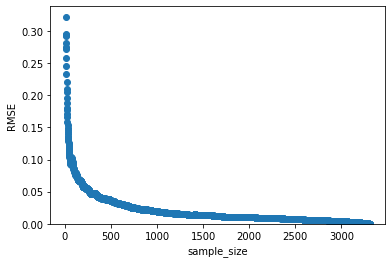

In [82]:
plt.scatter(range(10, n_max), rmse.values())
plt.xlabel("sample_size")
plt.ylabel("RMSE")
plt.ylim(0)
plt.show()

fig, ax = plt.subplots(len(range(0,n_max))):
    for i in len(range(0,n_max)):
        ax[i].plot(level_index[:], solution_dict[car]["m_late"]["level"][:])
        ax[i].set_ylim(0, solution_dict[car]["m_early"]["level"].max())
        ax[i].set_title("late_level")

In [18]:
rmse

{}